In [1]:
import shutil 
import numpy as np
import os

# Data Visualization
#import plotly.express as px
import matplotlib.pyplot as plt

# Image Processing
from PIL import Image

In [ ]:
# Function to create new folder if not exists 
def make_new_folder(folder_name, parent_folder): 
	
	# Path 
	path = os.path.join(parent_folder, folder_name) 
	
	# Create the folder 
	# 'new_folder' in 
	# parent_folder 
	try: 
		# mode of the folder 
		mode = 0o777

		# Create folder 
		os.mkdir(path, mode) 
	except OSError as error: 
		print(error) 

# current folder path 
current_folder = os.getcwd() 

# list of folders to be merged 
list_dir = ['test/mask', 'training/mask'] 

# enumerate on list_dir to get the 
# content of all the folders ans store 
# it in a dictionary 
content_list = {} 
for index, val in enumerate(list_dir): 
	path = os.path.join(current_folder, val) 
	content_list[ list_dir[index] ] = os.listdir(path) 

# folder in which all the content will 
# be merged 
merge_folder = "mask"

# merge_folder path - current_folder 
# + merge_folder 
merge_folder_path = os.path.join(current_folder, merge_folder) 

# create merge_folder if not exists 
make_new_folder(merge_folder, current_folder) 

# loop through the list of folders 
for sub_dir in content_list: 

	# loop through the contents of the 
	# list of folders 
	for contents in content_list[sub_dir]: 

		# make the path of the content to move 
		path_to_content = sub_dir + "/" + contents 

		# make the path with the current folder 
		dir_to_move = os.path.join(current_folder, path_to_content ) 

		# move the file 
		shutil.move(dir_to_move, merge_folder_path)


In [3]:
def get_image_paths(directory, valid_extensions=(".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tif")):
    image_paths = []
    
    # Iterate over all files in the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if file is an image based on its extension
            if file.lower().endswith(valid_extensions):
                # Append the full path of the image file to the list
                image_paths.append(os.path.join(root, file))
    
    return image_paths

def plot_image_grid(images, images_per_row=5, total_images=50, cmap="gray"):
    # Ensure we don't exceed the available images or the limit of 50
    total_images = min(total_images, len(images))
    
    # Calculate the number of rows needed
    num_rows = (total_images + images_per_row - 1) // images_per_row

    # Create a figure with a grid of subplots
    fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 3 * num_rows))

    # Flatten the axes array in case of more than one row
    axs = axs.ravel()

    for i in range(total_images):
        # Read and display the image
        img = images[i]
        axs[i].imshow(img, cmap)
        axs[i].axis('off')  # Turn off the axis for clean presentation

    # Turn off any remaining unused subplots (if total_images < images_per_row * num_rows)
    for j in range(total_images, len(axs)):
        axs[j].axis('off')

    # Show the grid of images
    plt.tight_layout()
    plt.show()

# data

In [20]:
IMG_PATHS = "C:/Users/User/Desktop/Isengard/images"
MASK_PATHS = "C:/Users/User/Desktop/Isengard/mask"
SEG_PATHS = "C:/Users/User/Desktop/Isengard/segmentation"

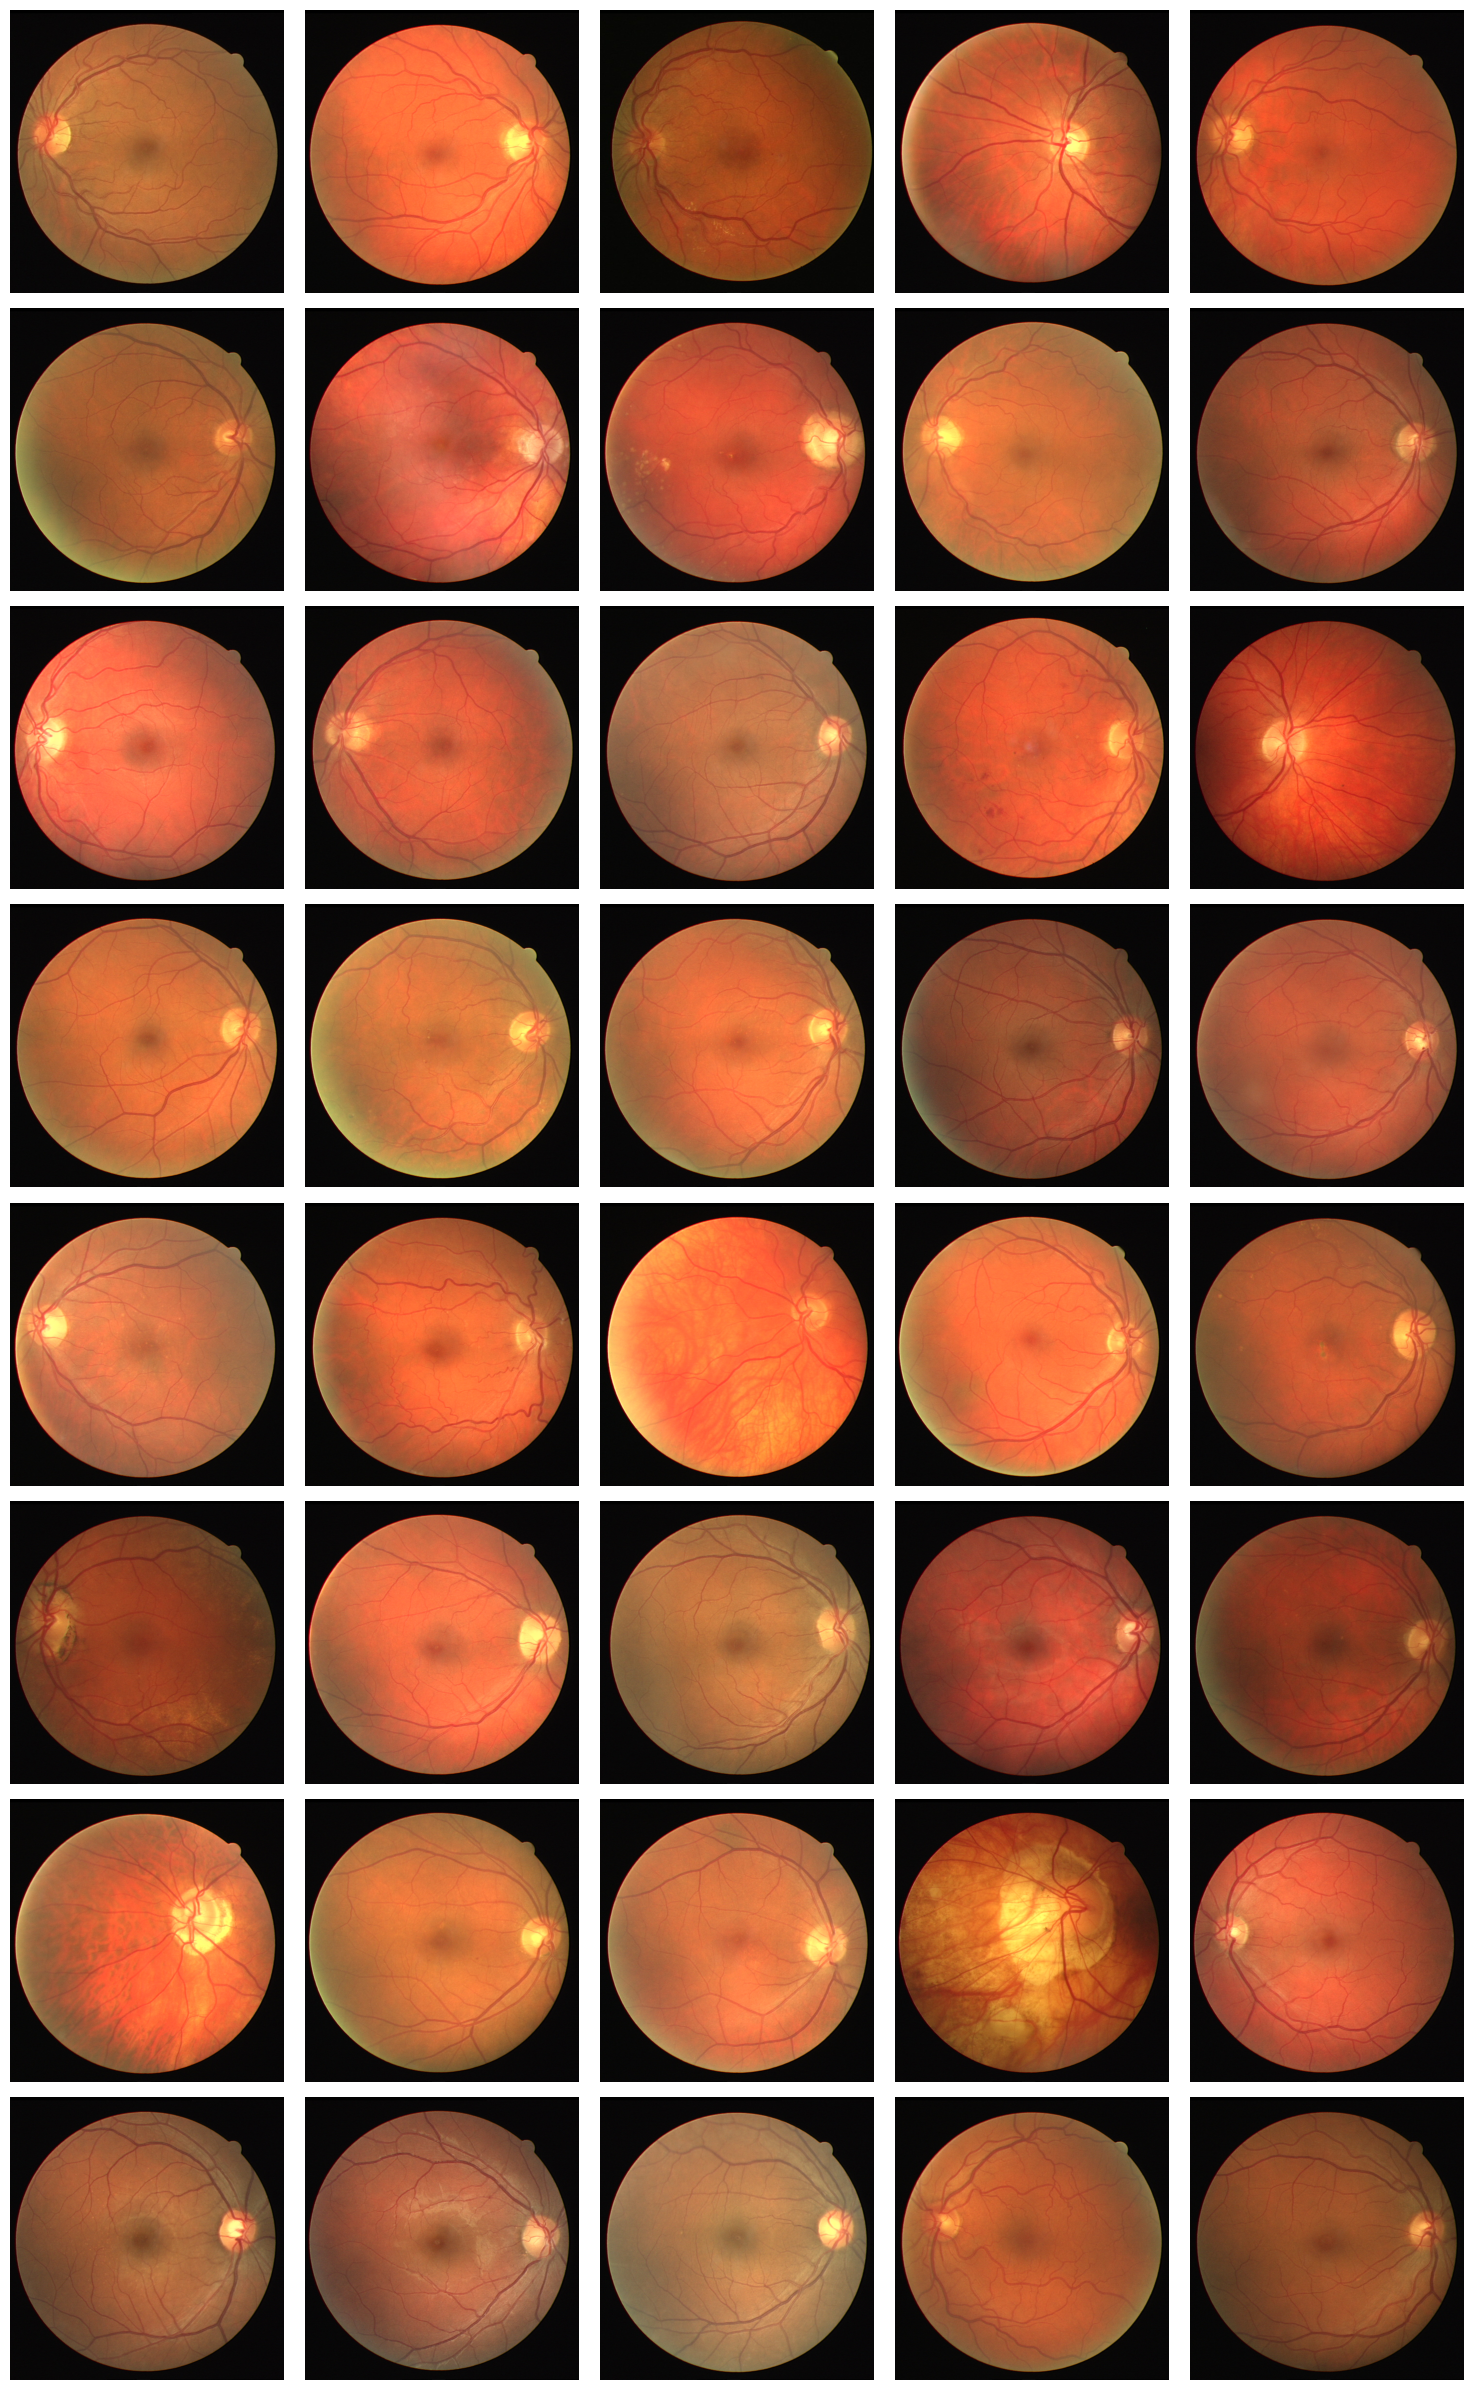

In [21]:
# Read all images path
image_paths = get_image_paths(IMG_PATHS)

# Read image using PIL and convert to numpy
images = []
for path in image_paths:
    image = Image.open(path)
    image = np.array(image)
    images.append(image)

# Plot images
plot_image_grid(images)

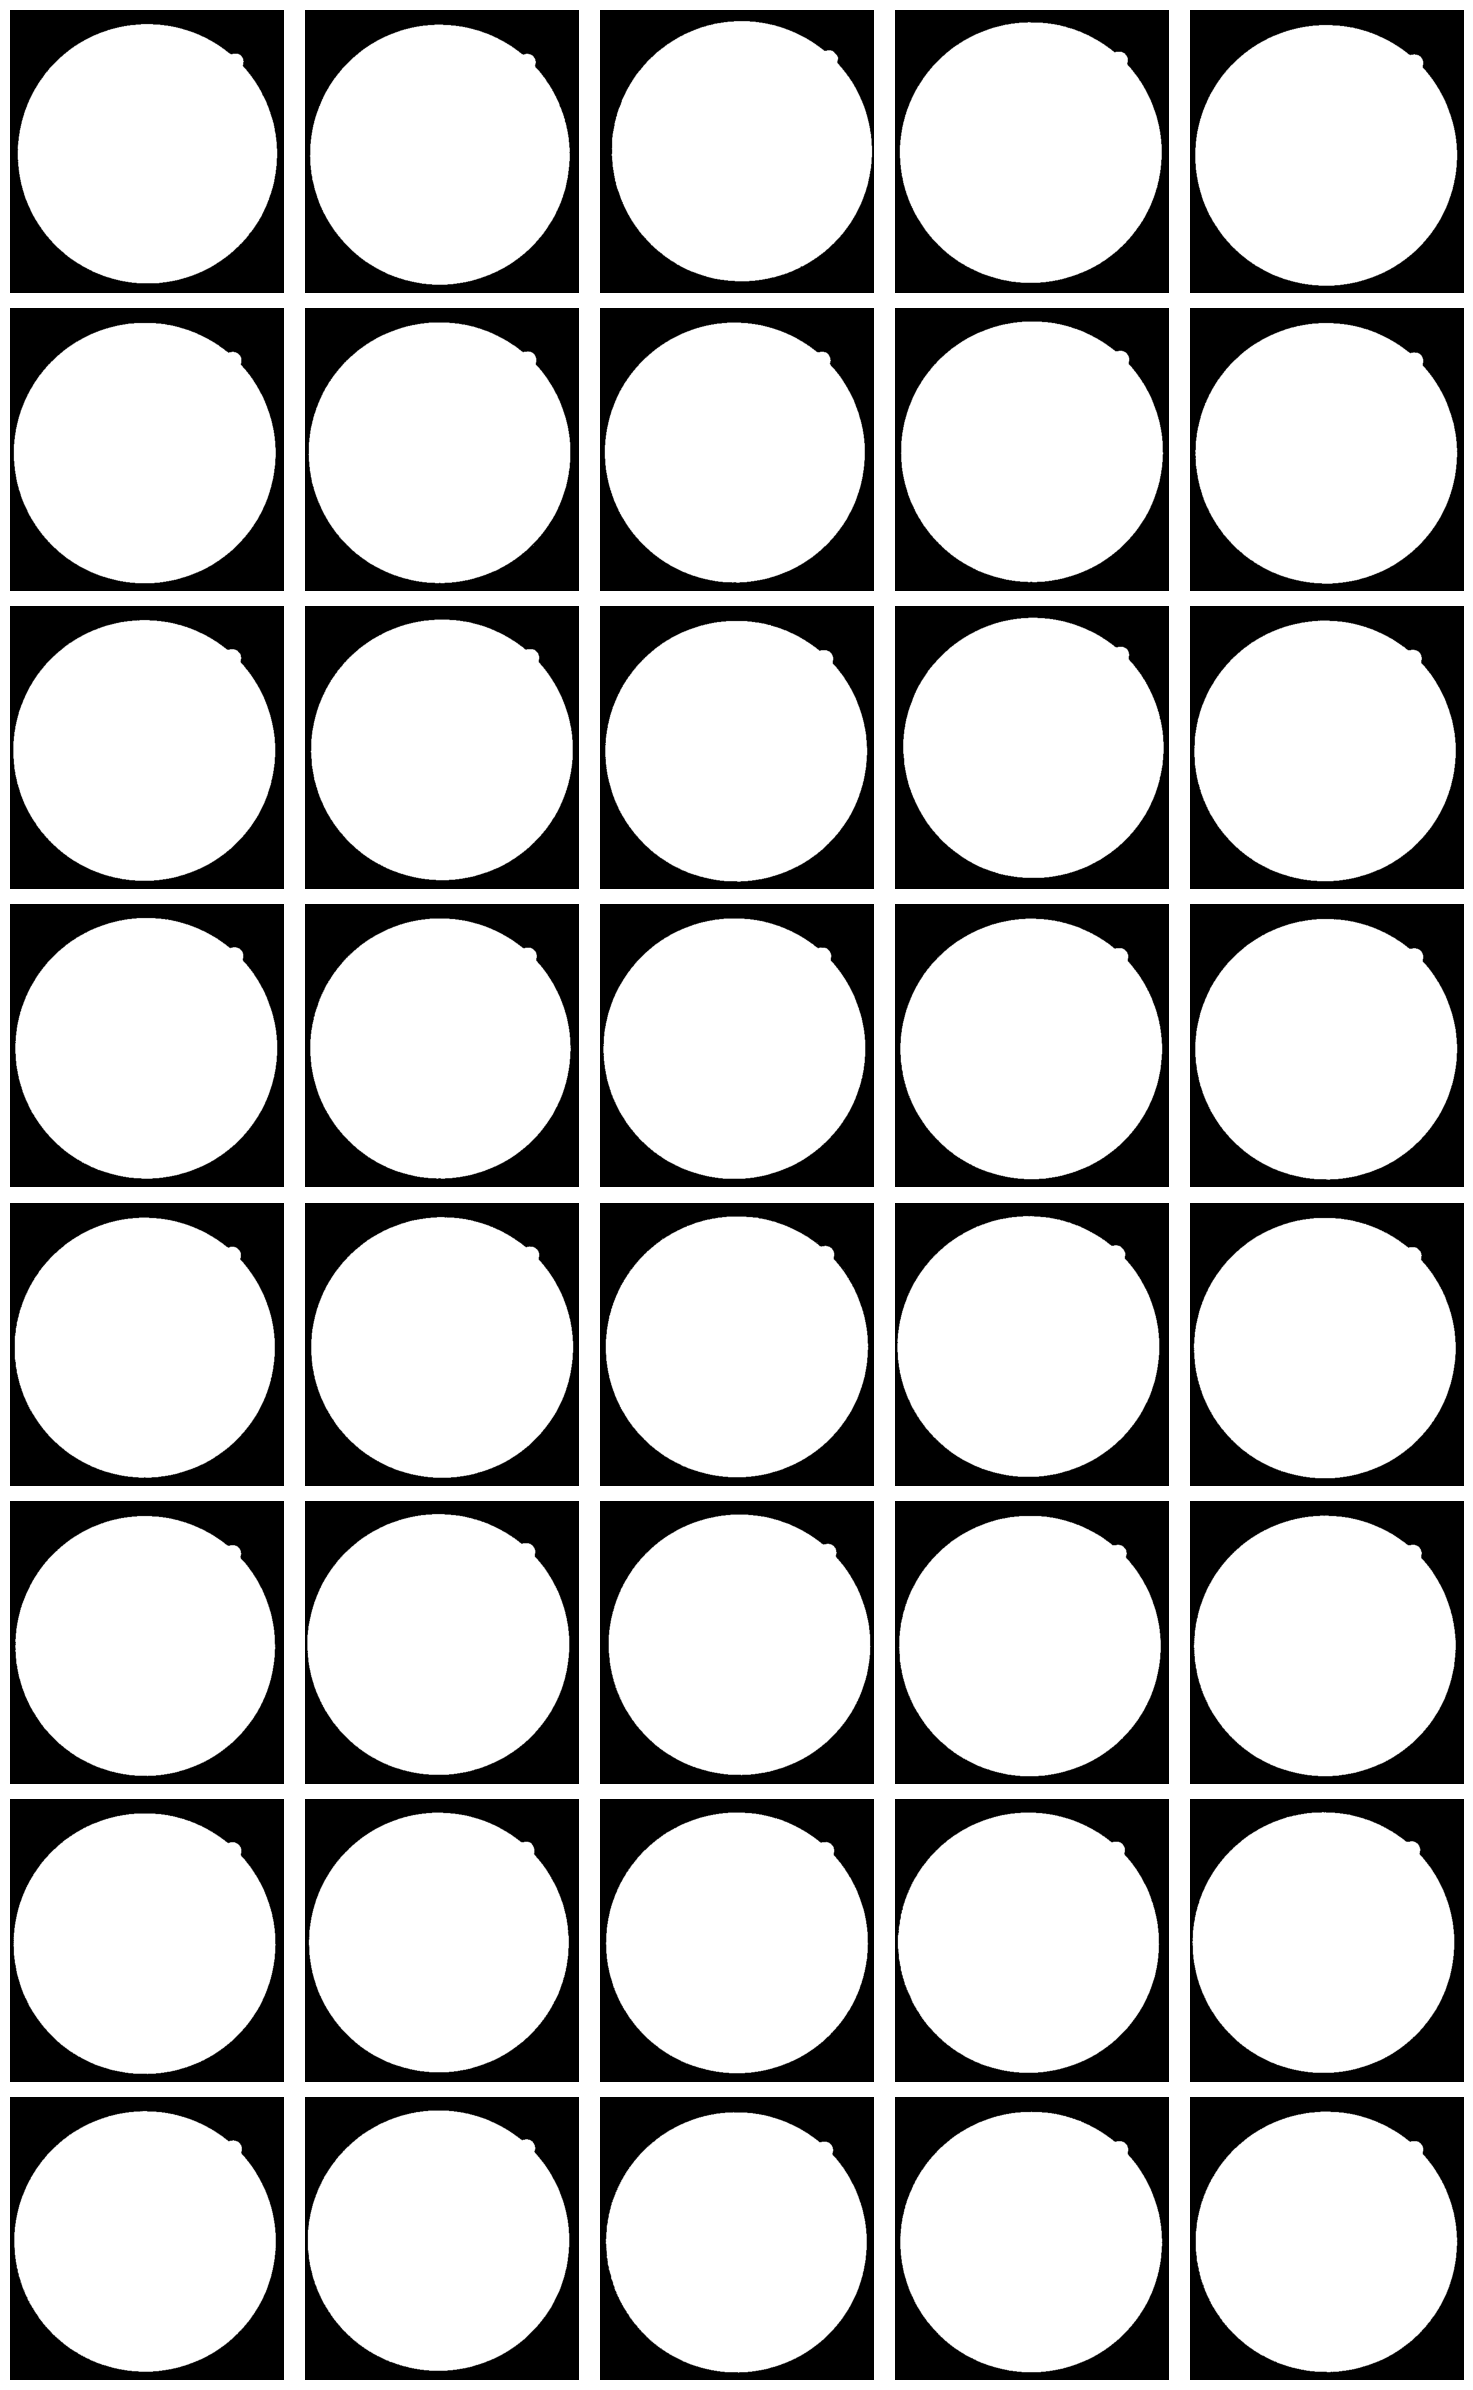

In [22]:
# Read all images path
mask_paths = get_image_paths(MASK_PATHS)

# Read image using PIL and convert to numpy
masks = []
for path in mask_paths:
    mask= Image.open(path)
    mask = np.array(mask)
    masks.append(mask)

# Plot images
plot_image_grid(masks)

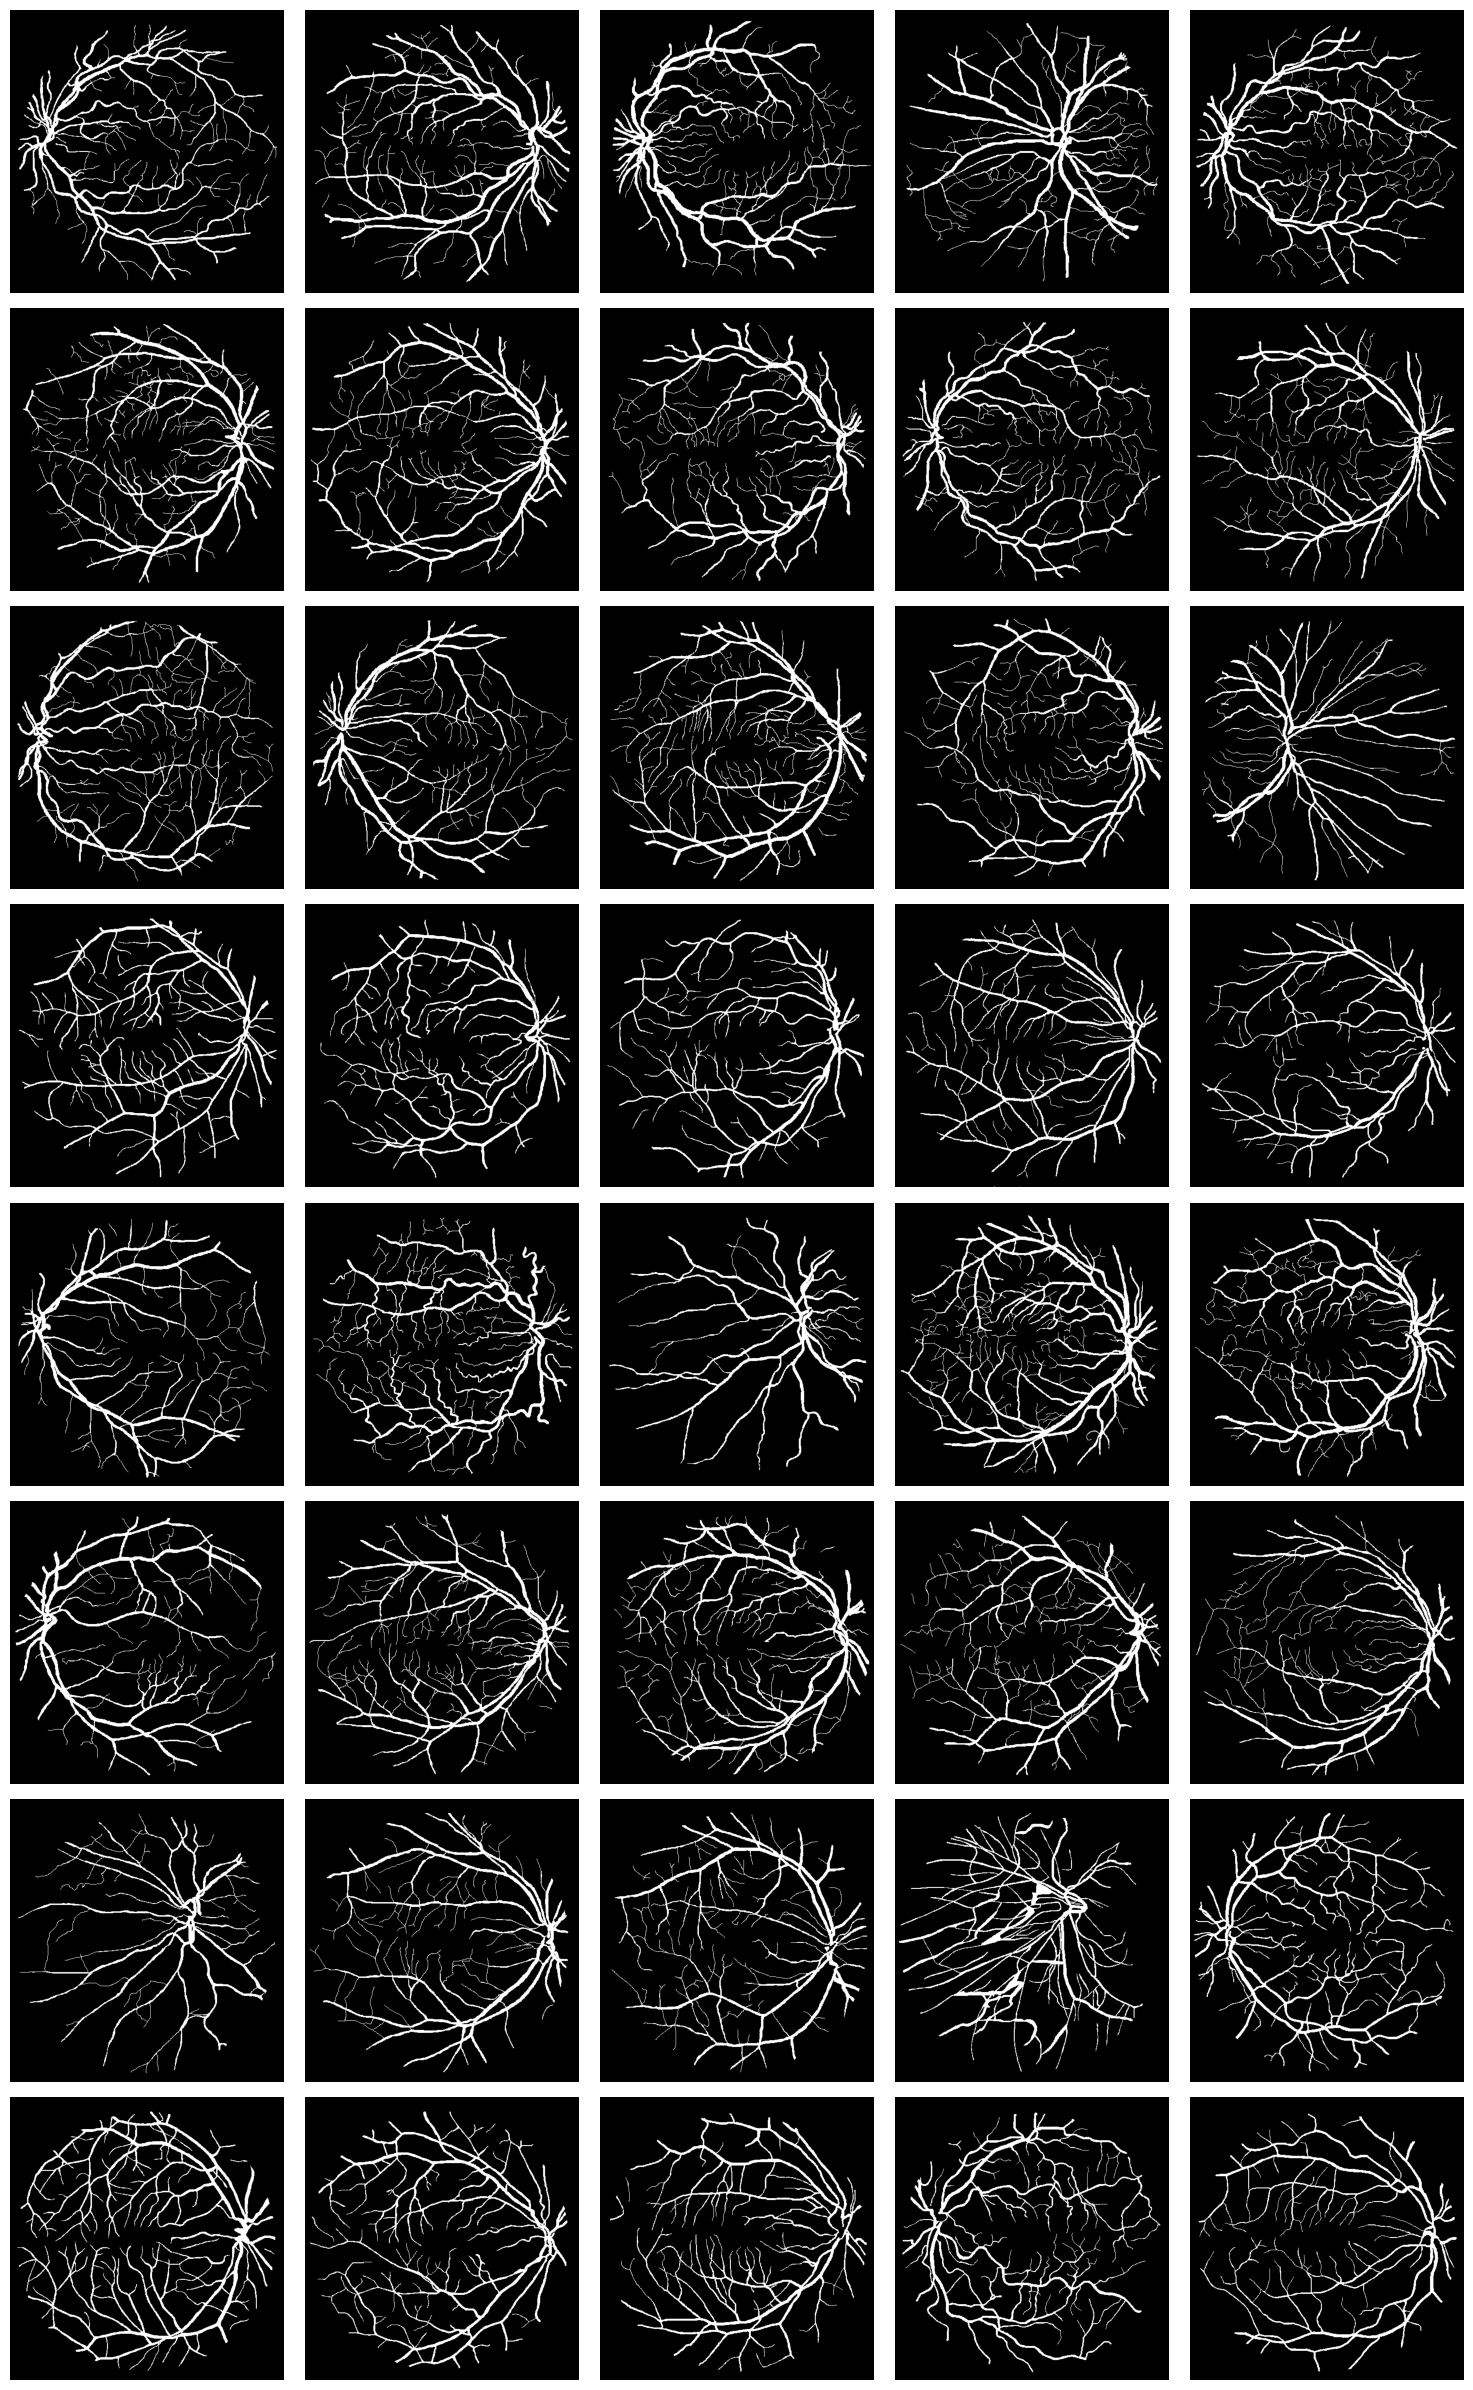

In [23]:
# Read all images path
seg_paths = get_image_paths(SEG_PATHS)

# Read image using PIL and convert to numpy
segs = []
for path in seg_paths:
    seg = Image.open(path)
    seg = np.array(seg)
    segs.append(seg)

# Plot images
plot_image_grid(segs)

In [24]:
print('image shape:',np.shape(images[0]))
print('mask shape:',np.shape(masks[0]))
print('segmentation shape:',np.shape(segs[0]))

image shape: (584, 565, 3)
mask shape: (584, 565)
segmentation shape: (584, 565)


In [49]:
bal_folder = "main"
make_new_folder(bal_folder, current_folder) 

img_folder = "main/images"
make_new_folder(img_folder, current_folder) 

mask_folder = "main/mask"
make_new_folder(mask_folder, current_folder) 

seg_folder = "main/segmentation"
make_new_folder(seg_folder, current_folder) 


dir_img = os.path.join(current_folder, img_folder) 
dir_mask = os.path.join(current_folder, mask_folder) 
dir_seg = os.path.join(current_folder, seg_folder) 

idx=-1

for i in range(len(images)):
    img = images[i]
    seg = segs[i]
    mask = masks[i]
    crop_img =  Image.fromarray(img).save(dir_img+"/"+str(i)+".png")
    crop_seg = Image.fromarray(seg).save(dir_seg+"/"+str(i)+".png")
    crop_mask = Image.fromarray(mask).save(dir_mask+"/"+str(i)+".png")

print("New dataset created")


New dataset created


(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

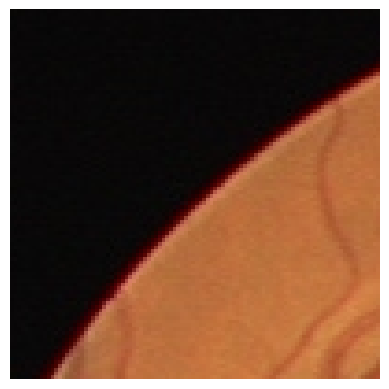

In [25]:
img = images[0]
crop =  img[50:150,50:150]
plt.imshow(crop)
plt.axis('off') 

In [39]:
bal_folder = "balanced2"
make_new_folder(bal_folder, current_folder) 

img_folder = "balanced2/images"
make_new_folder(img_folder, current_folder) 

mask_folder = "balanced2/mask"
make_new_folder(mask_folder, current_folder) 

seg_folder = "balanced2/segmentation"
make_new_folder(seg_folder, current_folder) 


In [40]:
dir_img = os.path.join(current_folder, img_folder) 
dir_mask = os.path.join(current_folder, mask_folder) 
dir_seg = os.path.join(current_folder, seg_folder) 

idx=-1

for i in range(len(images)):
    img = images[i]
    seg = segs[i]
    mask = masks[i]
    for k in range(20):
        idx=idx+1
        r_x = np.random.randint(129,328)
        r_y = np.random.randint(129,309)
        crop_img =  Image.fromarray(img[r_x:r_x+256, r_y:r_y+256]).save(dir_img+"/"+str(idx)+".png")
        crop_seg = Image.fromarray(seg[r_x:r_x+256, r_y:r_y+256]).save(dir_seg+"/"+str(idx)+".png")
        crop_mask = Image.fromarray(mask[r_x:r_x+256, r_y:r_y+256]).save(dir_mask+"/"+str(idx)+".png")

print("New dataset created")

New dataset created


### new dataset

In [41]:
import os
import numpy as np
import shutil
import pandas as pd

# creating train / val /test
root_dir_i = 'C:/Users/User/Desktop/Isengard/balanced2/images'
root_dir_m = 'C:/Users/User/Desktop/Isengard/balanced2/mask'
root_dir_s = 'C:/Users/User/Desktop/Isengard/balanced2/segmentation'

root_dir_i_2 = 'C:/Users/User/Desktop/Isengard/data2/img'
root_dir_m_2 = 'C:/Users/User/Desktop/Isengard/data2/mk'
root_dir_s_2 = 'C:/Users/User/Desktop/Isengard/data2/seg'

os.makedirs(root_dir_i_2 + '/train')
os.makedirs(root_dir_i_2 + '/val')
os.makedirs(root_dir_i_2 + '/test')

os.makedirs(root_dir_s_2 + '/train')
os.makedirs(root_dir_s_2 + '/val')
os.makedirs(root_dir_s_2 + '/test')

os.makedirs(root_dir_m_2 + '/train')
os.makedirs(root_dir_m_2 + '/val')
os.makedirs(root_dir_m_2 + '/test')

In [42]:
allFileNames_img = os.listdir(root_dir_i)
allFileNames_mask =os.listdir(root_dir_m)
allFileNames_seg =os.listdir(root_dir_s)
allFileNames = [allFileNames_img,allFileNames_mask,allFileNames_seg]

#print(allFileNames)
#print(np.shape(allFileNames))

In [43]:
df = pd.DataFrame(allFileNames)
 
# print the original DataFrame
#print("Original DataFrame :")
#print(df)
 
# shuffle the DataFrame rows
df = df.sample(frac = 1,axis=1)
 
# print the shuffled DataFrame
#print("\nShuffled DataFrame:")
#print(df)

In [44]:
allFileNames_img = df.loc[0]
allFileNames_mask = df.loc[1]
allFileNames_seg = df.loc[2]

In [45]:
    ## For example, Here : 
    ## training ratio = 0.75 ,
    ## test ratio = (0.95-0.75) [its "rain_ratio(0.75) + test_ration(0.2) = 0.95],
    ## and, no need to add validation ration, as it is automatically calculated
    ## validation ratio =  (1-0.95)

train_FileNames_img,val_FileNames_img,test_FileNames_img = np.split(np.array(allFileNames_img),[int(len(allFileNames_img)*0.75),int(len(allFileNames_img)*0.95)])
train_FileNames_seg,val_FileNames_seg,test_FileNames_seg = np.split(np.array(allFileNames_seg),[int(len(allFileNames_seg)*0.75),int(len(allFileNames_seg)*0.95)])
train_FileNames_mask,val_FileNames_mask,test_FileNames_mask = np.split(np.array(allFileNames_mask),[int(len(allFileNames_mask)*0.75),int(len(allFileNames_mask)*0.95)])

In [46]:
##Converting file names from array to list

train_FileNames_img = [root_dir_i+'/'+ name for name in train_FileNames_img]
val_FileNames_img = [root_dir_i+'/' + name for name in val_FileNames_img]
test_FileNames_img = [root_dir_i+'/' + name for name in test_FileNames_img]

## Copy pasting images to target directory

for n in train_FileNames_img:
    shutil.copy(n, root_dir_i_2+'/train/')

for n in val_FileNames_img:
    shutil.copy(n, root_dir_i_2 +'/val/')

for n in test_FileNames_img:
    shutil.copy(n,root_dir_i_2 +'/test/')

In [47]:
##Converting file names from array to list

train_FileNames_seg = [root_dir_s+'/'+ name for name in train_FileNames_seg]
val_FileNames_seg = [root_dir_s+'/' + name for name in val_FileNames_seg]
test_FileNames_seg = [root_dir_s+'/' + name for name in test_FileNames_seg]

## Copy pasting images to target directory

for n in train_FileNames_seg:
    shutil.copy(n, root_dir_s_2+'/train/')

for n in val_FileNames_seg:
    shutil.copy(n, root_dir_s_2 +'/val/')

for n in test_FileNames_seg:
    shutil.copy(n,root_dir_s_2 +'/test/')

In [48]:
##Converting file names from array to list

train_FileNames_mask = [root_dir_m+'/'+ name for name in train_FileNames_mask]
val_FileNames_mask = [root_dir_m+'/' + name for name in val_FileNames_mask]
test_FileNames_mask = [root_dir_m+'/' + name for name in test_FileNames_mask]

## Copy pasting images to target directory

for n in train_FileNames_mask:
    shutil.copy(n, root_dir_m_2+'/train/')

for n in val_FileNames_mask:
    shutil.copy(n, root_dir_m_2 +'/val/')

for n in test_FileNames_mask:
    shutil.copy(n,root_dir_m_2 +'/test/')